### Introduction:

- Customer sentiment analysis is the procedure of analyzing emotions from customer feedback or  online communications to find out how customers feel about a product, brand, or service. 
- It helps businesses gain insights and respond effectively to their customers. 
- It is an automated process done with the help of machine learning techniques as customers leave behind huge volume of data. 
- It helps businesses to identify where they lack and improve their products and services, optimize marketing startegies, monitor brand reputation. 
- There are diffrent types of sentiment analysis such as: Fine-grained Sentiment Analysis, Emotion detection, Aspect-based Sentiment Analysis and  Multilingual sentiment analysis. 
- There are many methods to do sentiment analysis as well: (i)Rule-based- algorithm based on manually crafted rules, (ii)Automatic- systems rely on machine learning techniques to learn from data, (iii) Hybrid systems combine both rule-based and automatic approaches. 

#### Importing necessary libraries and dataset

In [1]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import logging
logging.captureWarnings(True)

In [2]:

import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from imblearn.over_sampling import RandomOverSampler
import collections
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import random
random.seed(1)

Using TensorFlow backend.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\teena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# reading data
data=pd.read_csv("Tweets.csv")
data.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


#### Data Exploration

- Observing the number of data points

In [4]:
data.shape

(14640, 15)

- Identifying different types of sentiment present in the dataset

In [5]:
data.airline_sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

- Finding out the number of data points under each category of sentiment

In [6]:
data.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

- Calculating total number of different airlines present in the dataset

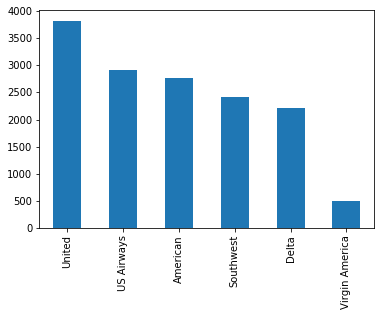

In [7]:

data.airline.value_counts().plot(kind="bar");

##### Analysing how many different sentiment values are present in each of the airline

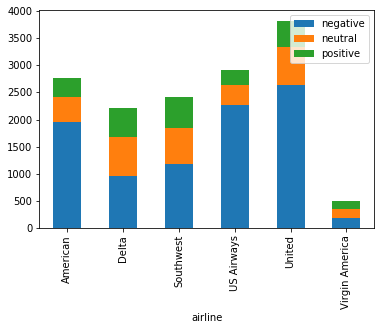

In [8]:
data.groupby(['airline','airline_sentiment']).size().unstack().plot(kind='bar',stacked=True)
plt.legend(loc="upper right")
plt.show()

##### Observing  reasons for negative feedback

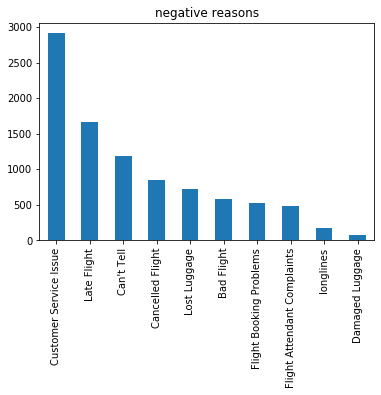

In [9]:

data.negativereason.value_counts().plot(kind="bar", title="negative reasons");

#####  Finding out top three reasons for negative feedback for each airline

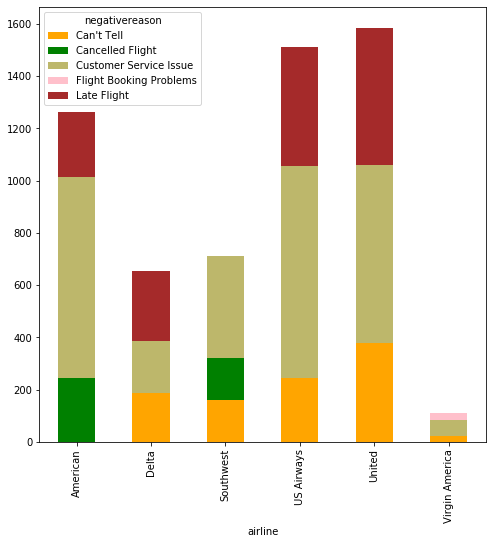

In [10]:
df = data.groupby(['airline','negativereason'])['negativereason'] .count().reset_index(name='negativereason_count').sort_values(by=['airline','negativereason_count'], ascending=False)
df=df.groupby("airline").head(3)

colors=["orange", "green","darkkhaki","pink","brown","magenta","cyan"]
pivot_df = df.pivot(index='airline', columns='negativereason', values='negativereason_count')
pivot_df.loc[:,].plot.bar(stacked=True, color=colors, figsize=(8,8));

##### Extracting datapoints that are tagged negative and plotting negative wordcloud

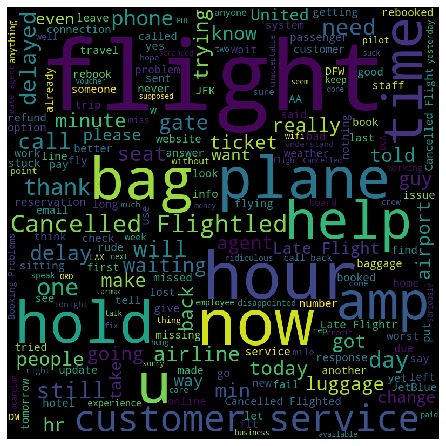

In [11]:

neg_tweets=data[data['airline_sentiment']=='negative']

words = ' '.join(neg_tweets ['text'])
clean_words = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=800,height=800,min_font_size = 10).generate(clean_words)

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

##### Extracting datapoints that are tagged positive and plotting positive wordcloud

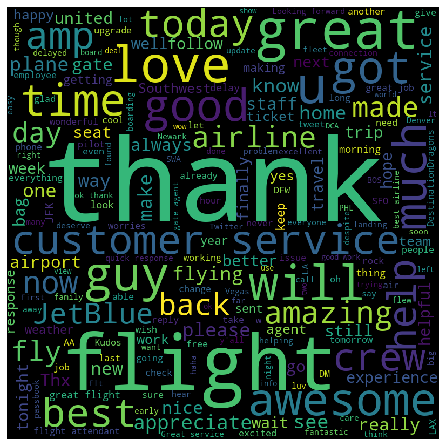

In [12]:
pos_tweets=data[data['airline_sentiment']=='positive']

words = ' '.join(pos_tweets ['text'])

clean_words = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=800,height=800,min_font_size = 10).generate(clean_words)

plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

##### Finding out high frequency words present in positive feedback

In [13]:
def freq(str_): 
    str_ = str_.split()          
    str2 = [] 
    stop_words=STOPWORDS
    for i in str_:              
        if i not in stop_words:
              if i not in str2: 
                str2.append(i)  
              
    for i in range(0, len(str2)): 
        if(str_.count(str2[i])>50): 
            print('Frequency of', str2[i], ':', str_.count(str2[i]))
        
print(freq(clean_words))

Frequency of time : 59
Frequency of I : 574
Frequency of fly : 54
Frequency of :) : 96
Frequency of good : 75
Frequency of much : 54
Frequency of great : 144
Frequency of &amp; : 77
Frequency of I'm : 67
Frequency of flying : 59
Frequency of Thanks! : 69
Frequency of flight : 263
Frequency of you. : 77
Frequency of love : 85
Frequency of You : 62
Frequency of crew : 51
Frequency of - : 87
Frequency of customer : 101
Frequency of back : 54
Frequency of us : 62
Frequency of best : 63
Frequency of Thank : 231
Frequency of thanks : 218
Frequency of service : 100
Frequency of you! : 129
Frequency of Thanks : 177
Frequency of thank : 204
Frequency of will : 85
Frequency of guys : 76
Frequency of got : 85
Frequency of made : 55
None


##### Marking text as feature and airline sentiment as labels

In [14]:
# marking features(tweet text) and labels
tweet_text = data.iloc[:, 10].values
labels = data.iloc[:, 1].values

In [15]:
tweet_text

array(['@VirginAmerica What @dhepburn said.',
       "@VirginAmerica plus you've added commercials to the experience... tacky.",
       "@VirginAmerica I didn't today... Must mean I need to take another trip!",
       ...,
       '@AmericanAir Please bring American Airlines to #BlackBerry10',
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",
       '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?'],
      dtype=object)

In [16]:
labels

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'negative',
       'neutral'], dtype=object)

-  Cleaning the tweet text of special characters, single characters, single characters from the start, multiple spaces with single space, converting to Lowercase

In [17]:

clean_tweets = []

for sentence in range(0, len(tweet_text)):
    clean_tweet = re.sub(r'\W', ' ', str(tweet_text[sentence]))
    clean_tweet=  re.sub(r'\s+[a-zA-Z]\s+', ' ', clean_tweet)
    clean_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', clean_tweet) 
    clean_tweet = re.sub(r'\s+', ' ', clean_tweet, flags=re.I)
    clean_tweet = re.sub(r'^b\s+', '', clean_tweet)
    clean_tweet = clean_tweet.lower()

    clean_tweets.append(clean_tweet)

In [18]:
len(clean_tweets)

14640

In [19]:
len(tweet_text)

14640

In [20]:
clean_tweets[0]

' virginamerica what dhepburn said '

##### Performing TF-IDF to give weightage to words


- Machine learning algorithms cannot work with raw text directly. 
- Text data requires special preparation before you can start using it for modeling.
- Rather, the text must be converted into vectors of numbers.
- The text must be parsed to remove words, called **tokenization**. 
- Then the words need to be encoded as integers or floating point values for use as input to a machine learning algorithm, called feature **vectorization (or extraction)**.
- Word counts are a good starting point, but are very basic.
- One issue with simple counts is that some words like “the” will appear many times and their large counts will not be very       meaningful in the encoded vectors.
- In natural language processing, useless words are referred to as **stop words** and such words are removed.
- The python natural language toolkit library provides a list of english stop words.
- Term Frequency (TF) - The number of times a word appears in a document divded by the total number of words in the document.
     Every document has its own term frequency. **This summarizes how often a given word appears within a document.**
- Inverse Data Frequency (IDF) - The log of the number of documents divided by the number of documents that contain the word       *w*. Inverse data frequency determines the weight of rare words across all documents in the corpus. The IDF is computed          once for all documents. **This downscales words that appear a lot across documents.**
- Lastly, the TF-IDF is simply the TF multiplied by IDF. Without going into the math, TF-IDF are word frequency scores that try   to highlight words that are more interesting, e.g. frequent in a document but not across documents

- With Tfidfvectorizer you compute the word counts, idf and tf-idf values all at once. The **TfidfVectorizer** will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents

In [21]:
vectorizer = TfidfVectorizer (max_features=12000, min_df=2, max_df=0.97, stop_words=stopwords.words('english'))

## max_features : build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
## min_df: When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. 
## max_df: When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold 
## stop_words: it is passed to _check_stop_list and the appropriate stop list is returned.

clean_tweets = vectorizer.fit_transform(clean_tweets).toarray()
clean_tweets[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [22]:
#vectorizer.vocabulary_.__len__()

##### splitting  dataset  into train and test data

- 20% of the data is assigned as test data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(clean_tweets, labels, test_size=0.2, random_state=0)

### Classification Models 

#### Random Forest Classifier

- Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in    the process.
- It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which      cancels out the biases.
- It is an easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of      the time
- It works in four steps:
    - Select random samples from a given dataset.
    - Construct a decision tree for each sample and get a prediction result from each decision tree.
    - Perform a vote for each predicted result.
    - Select the prediction result with the most votes as the final prediction.

In [24]:
RF_classifier = RandomForestClassifier(n_estimators=200,random_state=0)

## n_estimators :The number of trees in the forest.

RF_classifier.fit(X_train, y_train)
pred_RF = RF_classifier.predict(X_test)

print(confusion_matrix(y_test,pred_RF))

[[1733  100   37]
 [ 338  236   40]
 [ 147   58  239]]


##### Accuracy and F1 Score of Random Forest Classifier

In [25]:

print(classification_report(y_test,pred_RF))
print(accuracy_score(y_test, pred_RF))

              precision    recall  f1-score   support

    negative       0.78      0.93      0.85      1870
     neutral       0.60      0.38      0.47       614
    positive       0.76      0.54      0.63       444

    accuracy                           0.75      2928
   macro avg       0.71      0.62      0.65      2928
weighted avg       0.74      0.75      0.74      2928

0.7540983606557377


#### Logistic Regression
- Logistic Regression is the go-to method for binary classification problems.
- Logistic regression models the probabilities for classification problems with two possible outcomes. 
- It's an extension of the linear regression model for classification problems.
- The logistic regression model uses the logistic function to squeeze the output of a linear equation between 0 and 1.
- A threshold value is used on the former value to classify outputs as two different classes

In [26]:

LR_Classifier=LogisticRegression(random_state=0)
LR_Classifier.fit(X_train, y_train)
pred_LR = LR_Classifier.predict(X_test)

print(confusion_matrix(y_test,pred_LR))


[[1776   75   19]
 [ 324  250   40]
 [ 152   48  244]]


##### Accuracy and F1 Score of Logistic Regression

In [27]:
print(classification_report(y_test,pred_LR))
print(accuracy_score(y_test, pred_LR))

              precision    recall  f1-score   support

    negative       0.79      0.95      0.86      1870
     neutral       0.67      0.41      0.51       614
    positive       0.81      0.55      0.65       444

    accuracy                           0.78      2928
   macro avg       0.75      0.64      0.67      2928
weighted avg       0.77      0.78      0.76      2928

0.7752732240437158


### Results of Base Models

 **Precision is the ratio between the correct predictions and the total predictions of that class.**
 <br>**Recall is the ratio of the correct predictions and the total items in that class.**

**Random Forest Model**
- Accuracy of the model is 0.75.
- Precision of the model is 0.78, 0.60 and 0.76 for negative, neutral and positive respectively.
- Recall of the model is 0.93, 0.38 and 0.54 for negative, neutral and positive respectively.

**Logistic Regression**
- Accuracy of the model is 0.78.
- Precision of the model is 0.79, 0.67 and 0.81 for negative, neutral and positive respectively.
- Recall of the model is 0.95, 0.41 and 0.55 for negative, neutral and positive respectively. 


- *Recall is  low for neutral and positive classes.*
- Support shows that test data is not balanced indicating that dataset is  imbalanced.
- Dataset shall be balanced and trained again to evaluate the performance of the model. 

#### Checking number of datapoints in each class

In [28]:
counter = collections.Counter(labels)
print(counter)

Counter({'negative': 9178, 'neutral': 3099, 'positive': 2363})


### Balancing the dataset

#### Balancing the dataset using RandomOverSampler function

In [29]:
tweet_text_reshape=tweet_text.reshape(-1,1)
ros = RandomOverSampler()
tweet_text_oversampled, label_oversampled = ros.fit_sample(tweet_text_reshape, labels)

- Checking number of datapoints in each class in the balanced dataset

In [30]:
counter = collections.Counter(label_oversampled)
print(counter)

Counter({'neutral': 9178, 'positive': 9178, 'negative': 9178})


- Cleaning the tweet text of special characters, single characters, single characters from the start, multiple spaces with single space, converting to Lowercase

In [31]:
clean_tweets = []

for sentence in range(0, len(tweet_text_oversampled)):
    clean_tweet = re.sub(r'\W', ' ', str(tweet_text_oversampled[sentence]))
    clean_tweet= re.sub(r'\s+[a-zA-Z]\s+', ' ', clean_tweet)
    clean_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', clean_tweet) 
    clean_tweet = re.sub(r'\s+', ' ', clean_tweet, flags=re.I)
    clean_tweet = re.sub(r'^b\s+', '', clean_tweet)
    clean_tweet = clean_tweet.lower()

    clean_tweets.append(clean_tweet)


#### Performing TF-IDF to give weightage to words

In [32]:
vectorizer = TfidfVectorizer (max_features=12000, min_df=2, max_df=0.97, stop_words=stopwords.words('english'))
clean_tweets = vectorizer.fit_transform(clean_tweets).toarray()

#### Splitting balanced dataset into test and train data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(clean_tweets, label_oversampled, test_size=0.2, random_state=0)

### Models on balanced dataset

#### Random Forest Clasifier 

In [34]:
RF_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
RF_classifier.fit(X_train, y_train)
pred_RF = RF_classifier.predict(X_test)

print(confusion_matrix(y_test,pred_RF))


[[1559  206   58]
 [  47 1737   44]
 [  14   15 1827]]


##### Accuracy and F1 Score of Random Forest Classifier

In [35]:
print(classification_report(y_test,pred_RF))
print(accuracy_score(y_test, pred_RF))

              precision    recall  f1-score   support

    negative       0.96      0.86      0.91      1823
     neutral       0.89      0.95      0.92      1828
    positive       0.95      0.98      0.97      1856

    accuracy                           0.93      5507
   macro avg       0.93      0.93      0.93      5507
weighted avg       0.93      0.93      0.93      5507

0.9302705647357908


#### Logistic Regression

In [36]:
LR_Classifier=LogisticRegression(random_state=0)
LR_Classifier.fit(X_train, y_train)
pred_LR = LR_Classifier.predict(X_test)

print(confusion_matrix(y_test,pred_LR))


[[1461  268   94]
 [ 189 1512  127]
 [  72  110 1674]]


##### Accuracy and F1 Score of Logistic Regression

In [37]:
print(classification_report(y_test,pred_LR))
print(accuracy_score(y_test, pred_LR))

              precision    recall  f1-score   support

    negative       0.85      0.80      0.82      1823
     neutral       0.80      0.83      0.81      1828
    positive       0.88      0.90      0.89      1856

    accuracy                           0.84      5507
   macro avg       0.84      0.84      0.84      5507
weighted avg       0.84      0.84      0.84      5507

0.8438351189395316


### Results of Models on Balanced Dataset

**Random Forest Model**
- Accuracy of the model is 0.93
- Precision of the model is 0.96, 0.89 and 0.95 for negative, neutral and positive respectively. 
- Recall of the model is 0.86, 0.95 and 0.98 for negative, neutral and positive respectively. 

**Logistic Regression Model**
- Accuracy of the model is 0.84.
- Precision of the model is 0.85 0.80 and 0.88 for negative, neutral and positive respectively. 
- Recall of the model is 0.80, 0.83 and 0.90 for negative, neutral and positive respectively. 


**Random Forest model on balanced daatset worked the best with f1-score close 0.90 & above for all classes**

#### References:

https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/                                             
https://machinelearningmastery.com/logistic-regression-for-machine-learning/                                                   
https://christophm.github.io/interpretable-ml-book/logistic.html                                                               
https://www.datacamp.com/community/tutorials/random-forests-classifier-python                                                   
https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76                       
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html                                 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html                                 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html                                   
https://stackoverflow.com/questions/47557417/understanding-text-feature-extraction-tfidfvectorizer-in-python-scikit-learn